## 4721美琪瑪

In [1]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [3]:
def get_otc_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y_%m").tolist()

    df = pd.DataFrame()
#     pd.set_option('display.max_rows', None)
    for day in month_list:
        year, month = day.split('_')
        day = str(int(year) - 1911) + '/' + month
        url = "https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43_result.php?l=zh-tw&d=" + day + "&stkno=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['aaData'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [4]:
stock  = get_otc_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 4721)
stock 

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,403,"24,938",62.30,62.60,61.10,61.90,0.20,314
1,110/06/02,"2,042","130,640",63.50,65.50,62.40,62.90,1.00,"1,524"
2,110/06/03,565,"35,208",62.90,63.30,61.80,62.00,-0.90,461
3,110/06/04,295,"18,182",61.50,62.60,60.80,61.20,-0.80,259
4,110/06/07,342,"20,690",61.60,61.60,59.20,61.50,0.30,295
...,...,...,...,...,...,...,...,...,...
240,111/05/25,982,"131,515",132.50,136.00,131.50,135.00,3.00,859
241,111/05/26,882,"118,762",136.00,136.50,132.50,133.00,-2.00,717
242,111/05/27,934,"125,924",134.50,136.00,133.50,133.50,0.50,682
243,111/05/30,"1,862","256,345",136.00,139.00,135.50,138.00,4.50,"1,459"


In [5]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-06-01 00:00:00,403,24938,62.3,62.6,61.1,61.9,0.20,314
1,2021-06-02 00:00:00,2042,130640,63.5,65.5,62.4,62.9,1.00,1524
2,2021-06-03 00:00:00,565,35208,62.9,63.3,61.8,62,-0.90,461
3,2021-06-04 00:00:00,295,18182,61.5,62.6,60.8,61.2,-0.80,259
4,2021-06-07 00:00:00,342,20690,61.6,61.6,59.2,61.5,0.30,295
5,2021-06-08 00:00:00,140,8610,62.5,62.5,61.3,61.8,0.30,131
6,2021-06-09 00:00:00,241,14773,62.3,62.3,60.2,60.6,-1.20,208
7,2021-06-10 00:00:00,207,12647,61,62,60.6,61,0.40,184
8,2021-06-11 00:00:00,178,10941,62.4,62.4,61,61.2,0.20,159
9,2021-06-15 00:00:00,269,16595,62,62.4,61,62.2,1.00,234


In [6]:
stock.to_csv("4721.csv")

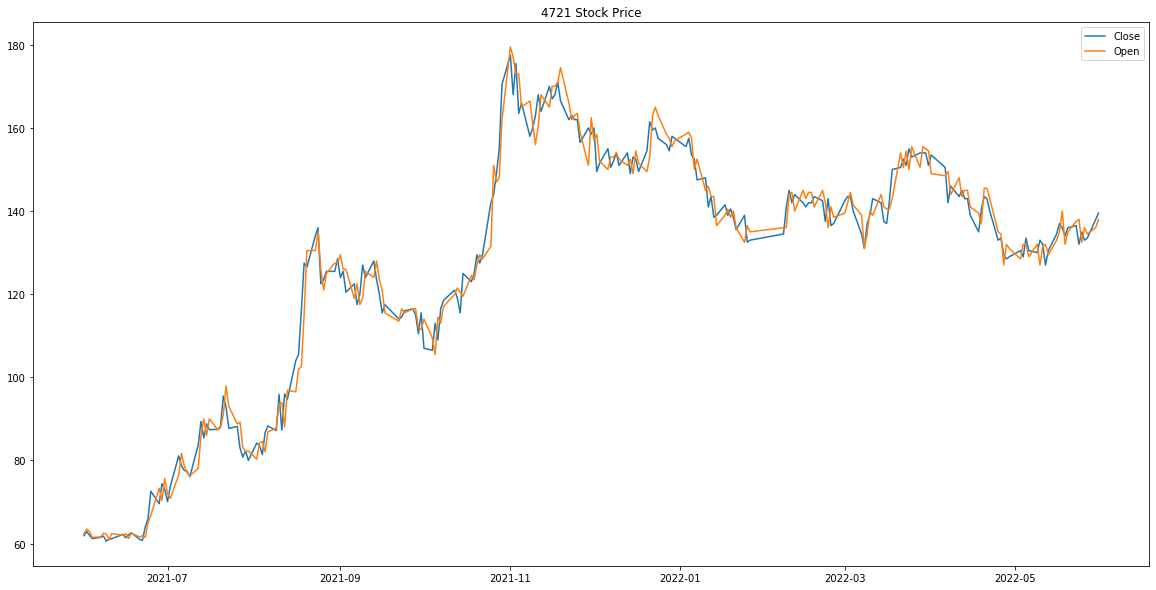

In [7]:
fig = plt.figure(figsize = (20, 10))
plt.title('4721 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [8]:
#上市股: '.tw'
#上櫃股: '.two'
#公式: =GOOGLEFINANCE("TPE:股票代碼")
#舉例: =GOOGLEFINANCE("TPE:2474")
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 4721.two
便宜價: 20.16
中間價: 26.88
太貴價: 33.6


In [8]:
import datetime as datetime

In [9]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_4721 = yf.download('4721.two', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


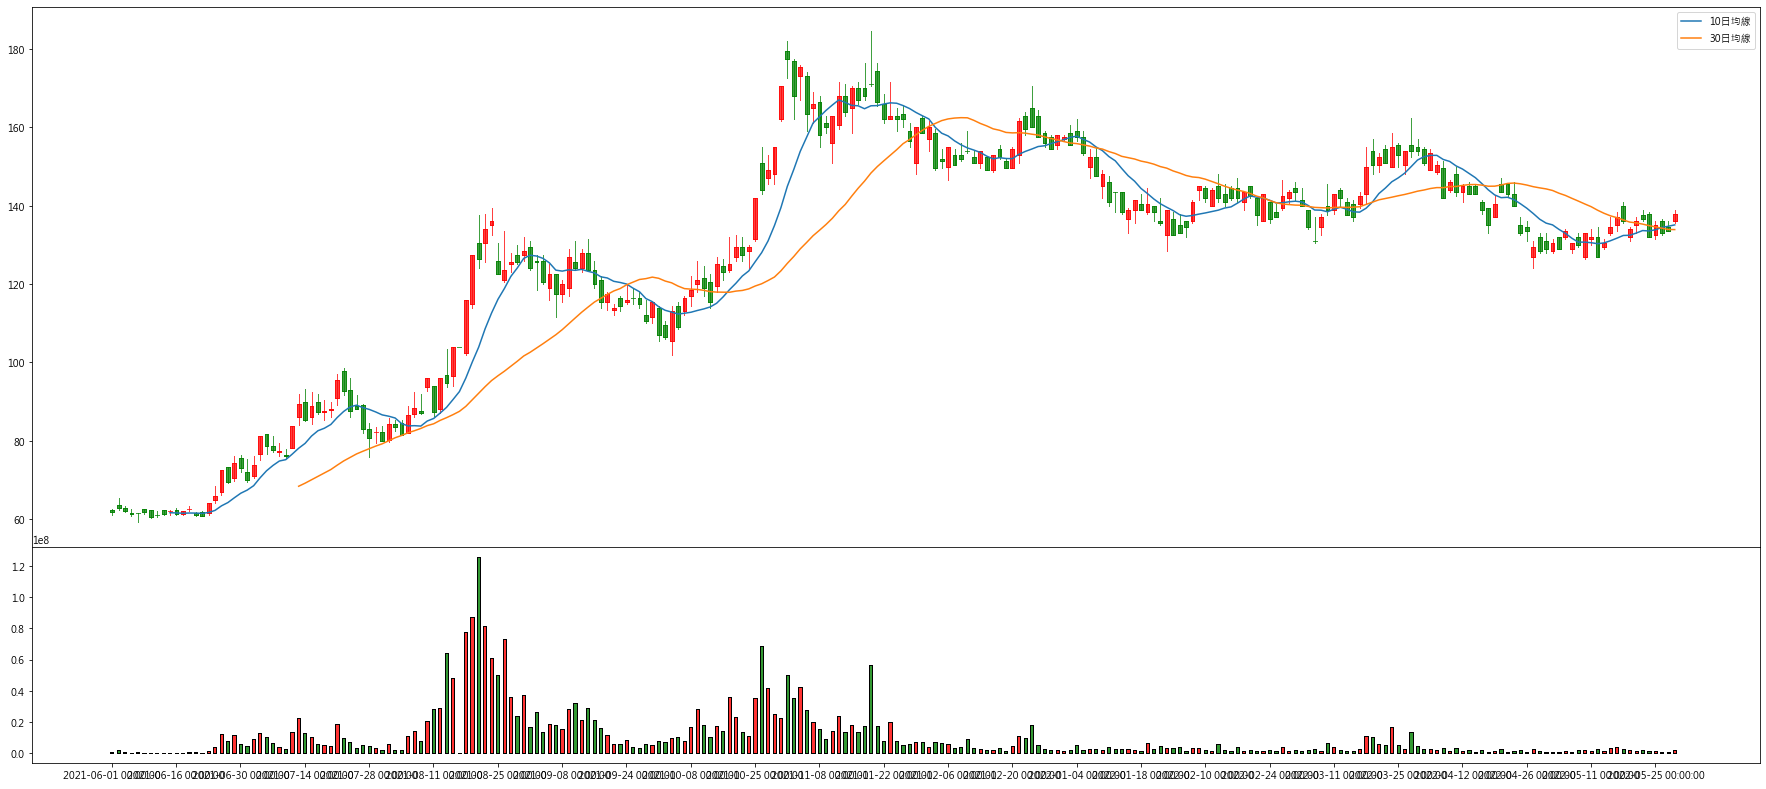

In [11]:
sma_10 = talib.SMA(np.array(df_4721['Close']), 10)
sma_30 = talib.SMA(np.array(df_4721['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_4721.index), 10))
ax.set_xticklabels(df_4721.index[::10])
mpf.candlestick2_ochl(ax, df_4721['Open'], df_4721['Close'], df_4721['High'],
                      df_4721['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_4721['Open'], df_4721['Close'], df_4721['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_4721.index), 10))
ax2.set_xticklabels(df_4721.index[::10])

ax.legend();

---

## 2377微星

In [1]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [3]:
stock = get_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 2377)
stock

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,"6,036,378","1,022,221,540",166.50,172.00,164.50,171.50,+6.00,"4,271"
1,110/06/02,"6,601,776","1,126,544,812",175.00,175.00,168.50,170.00,-1.50,"4,739"
2,110/06/03,"6,217,127","1,077,618,759",171.50,175.00,169.00,175.00,+5.00,"3,883"
3,110/06/04,"3,857,060","660,283,326",173.50,174.00,170.00,170.00,-5.00,"2,973"
4,110/06/07,"3,375,373","572,690,202",171.00,172.00,165.50,171.00,+1.00,"2,349"
...,...,...,...,...,...,...,...,...,...
240,111/05/25,"4,897,432","623,614,472",124.50,129.00,124.00,127.50,+3.50,"3,744"
241,111/05/26,"2,677,029","342,952,786",127.50,129.50,126.50,128.00,+0.50,"2,179"
242,111/05/27,"5,227,834","690,372,572",129.50,134.00,129.00,132.00,+4.00,"4,319"
243,111/05/30,"6,190,490","834,287,744",134.50,137.00,133.00,134.00,+2.00,"5,408"


In [4]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-06-01 00:00:00,6.03638e+06,1.02222e+09,166.5,172,164.5,171.5,+6.00,4271
1,2021-06-02 00:00:00,6.60178e+06,1.12654e+09,175,175,168.5,170,-1.50,4739
2,2021-06-03 00:00:00,6.21713e+06,1.07762e+09,171.5,175,169,175,+5.00,3883
3,2021-06-04 00:00:00,3.85706e+06,6.60283e+08,173.5,174,170,170,-5.00,2973
4,2021-06-07 00:00:00,3.37537e+06,5.7269e+08,171,172,165.5,171,+1.00,2349
5,2021-06-08 00:00:00,1.95475e+06,3.33845e+08,172,173.5,169.5,170,-1.00,1602
6,2021-06-09 00:00:00,4.9463e+06,8.38589e+08,169.5,171.5,167.5,169,-1.00,2397
7,2021-06-10 00:00:00,5.49934e+06,9.44938e+08,170.5,173.5,169,172,+3.00,3089
8,2021-06-11 00:00:00,4.93533e+06,8.31245e+08,172,172.5,166,167,-5.00,3862
9,2021-06-15 00:00:00,4.5126e+06,7.62475e+08,167,170.5,166.5,169.5,+2.50,2416


In [5]:
stock.to_csv("2377.csv")

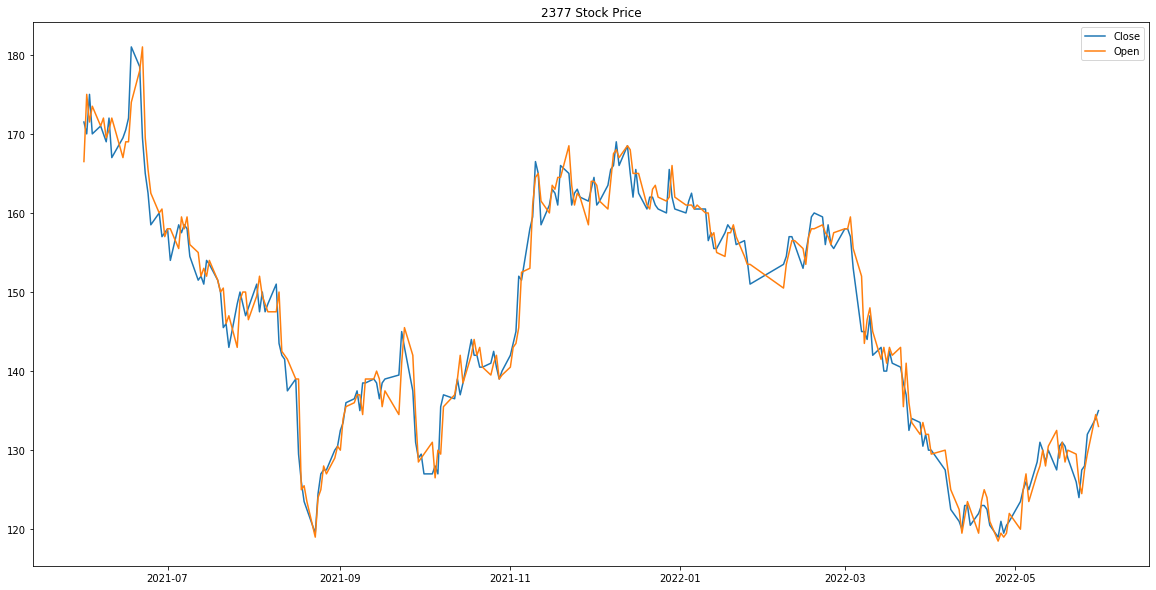

In [6]:
fig = plt.figure(figsize = (20, 10))
plt.title('2377 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [8]:
#上市股: '.tw'
#上櫃股: '.two'
#公式: =GOOGLEFINANCE("TPE:股票代碼")
#舉例: =GOOGLEFINANCE("TPE:2474")
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 2377.tw
便宜價: 36.72
中間價: 48.96
太貴價: 61.2


In [9]:
import datetime as datetime

In [10]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_2377 = yf.download(['MSI'], data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


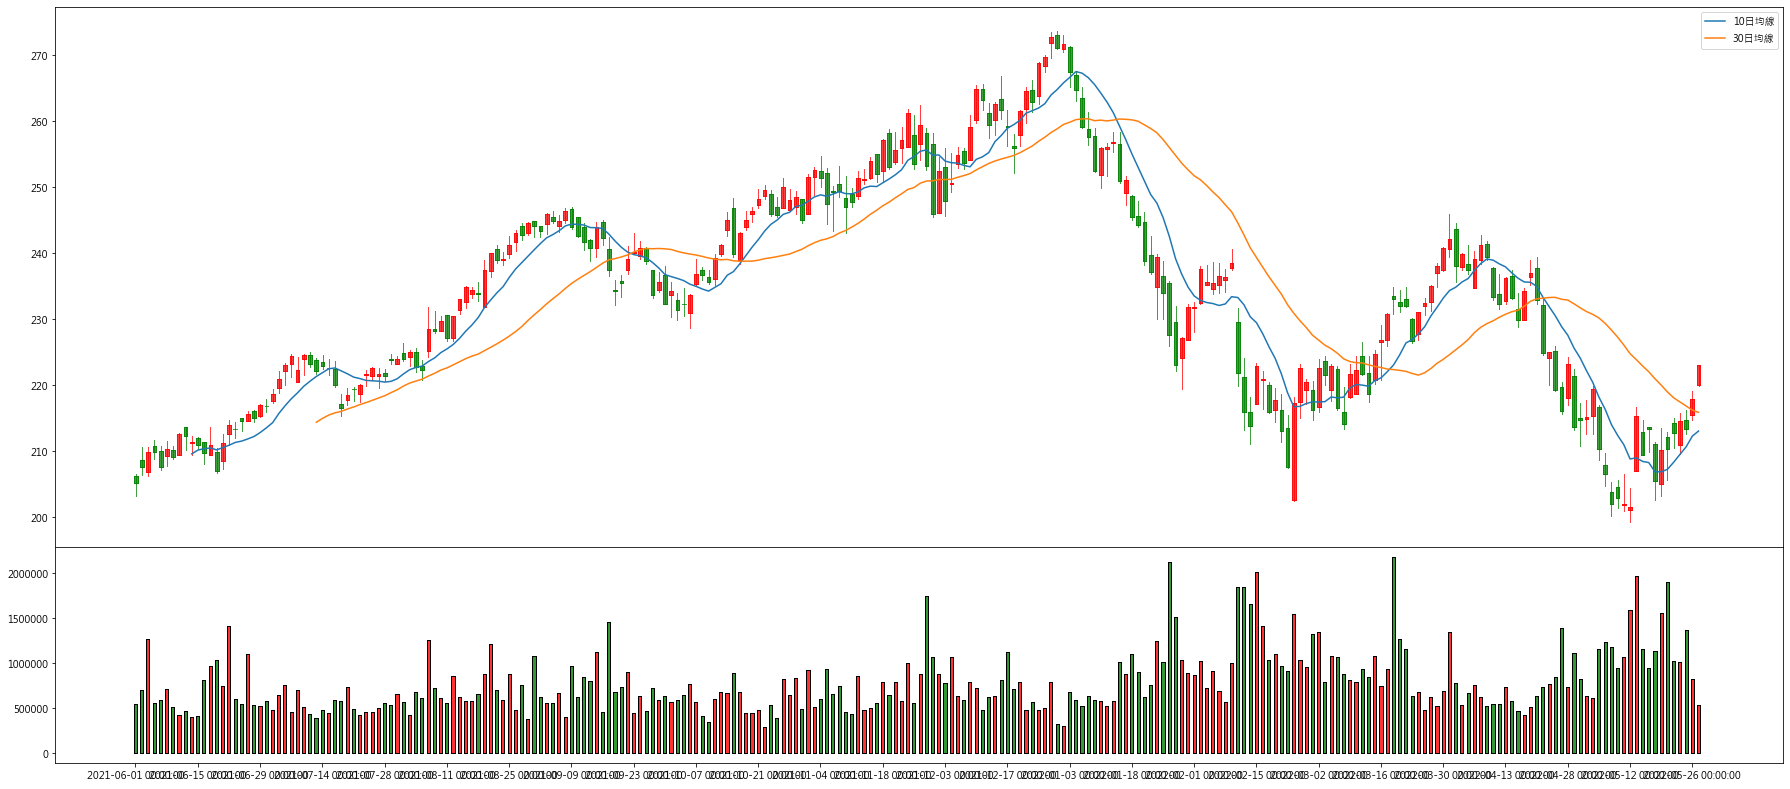

In [11]:
sma_10 = talib.SMA(np.array(df_2377['Close']), 10)
sma_30 = talib.SMA(np.array(df_2377['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2377.index), 10))
ax.set_xticklabels(df_2377.index[::10])
mpf.candlestick2_ochl(ax, df_2377['Open'], df_2377['Close'], df_2377['High'],
                      df_2377['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2377['Open'], df_2377['Close'], df_2377['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2377.index), 10))
ax2.set_xticklabels(df_2377.index[::10])

ax.legend();

---

## 2308台達電

In [1]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [3]:
stock = get_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 2308)
stock

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,"3,940,528","1,164,678,532",295.00,297.00,294.50,297.00,+1.00,"3,151"
1,110/06/02,"5,782,009","1,722,333,988",298.00,299.00,296.50,298.50,+1.50,"4,873"
2,110/06/03,"9,396,892","2,789,626,981",298.50,299.50,295.00,297.00,-1.50,"4,210"
3,110/06/04,"4,729,360","1,402,618,245",294.00,298.50,293.50,297.00,0.00,"3,540"
4,110/06/07,"4,976,293","1,475,318,732",298.00,299.00,294.00,297.00,0.00,"3,662"
...,...,...,...,...,...,...,...,...,...
240,111/05/25,"4,524,643","1,004,621,518",223.00,224.00,220.00,222.50,+2.50,"3,368"
241,111/05/26,"2,682,678","601,363,990",224.50,226.00,222.50,224.00,+1.50,"3,504"
242,111/05/27,"5,473,693","1,259,596,129",226.00,233.50,225.00,231.50,+7.50,"6,887"
243,111/05/30,"5,288,426","1,250,831,982",235.50,239.00,233.00,238.50,+7.00,"5,911"


In [4]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-06-01 00:00:00,3.94053e+06,1.16468e+09,295,297,294.5,297,+1.00,3151
1,2021-06-02 00:00:00,5.78201e+06,1.72233e+09,298,299,296.5,298.5,+1.50,4873
2,2021-06-03 00:00:00,9.39689e+06,2.78963e+09,298.5,299.5,295,297,-1.50,4210
3,2021-06-04 00:00:00,4.72936e+06,1.40262e+09,294,298.5,293.5,297,0.00,3540
4,2021-06-07 00:00:00,4.97629e+06,1.47532e+09,298,299,294,297,0.00,3662
5,2021-06-08 00:00:00,2.63744e+06,7.8384e+08,299,299,296,297.5,+0.50,2234
6,2021-06-09 00:00:00,5.39264e+06,1.59926e+09,297,299,293.5,295,-2.50,4432
7,2021-06-10 00:00:00,3.75334e+06,1.10809e+09,296.5,297,294,295,0.00,3258
8,2021-06-11 00:00:00,2.9189e+06,8.65942e+08,295,298,295,296.5,+1.50,2772
9,2021-06-15 00:00:00,7.75738e+06,2.34801e+09,298.5,307,298,302,+5.50,7401


In [5]:
stock.to_csv("2308.csv")

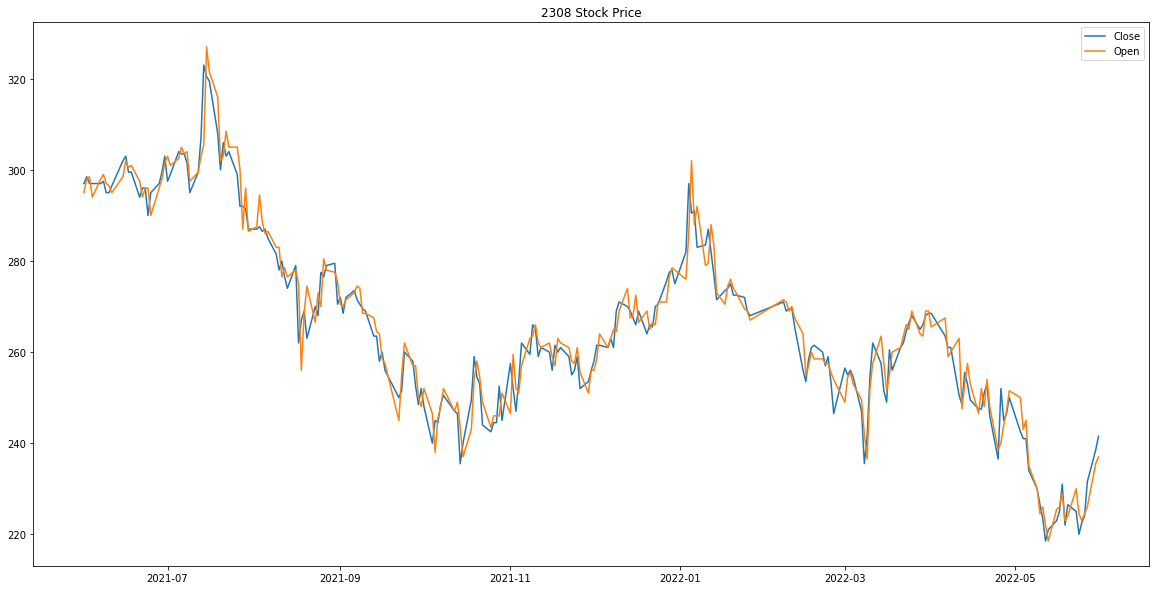

In [6]:
fig = plt.figure(figsize = (20, 10))
plt.title('2308 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [12]:
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 2308.tw
便宜價: 62.16
中間價: 82.88
太貴價: 103.6


In [8]:
import datetime as datetime

In [9]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_2308 = yf.download('2308.tw', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


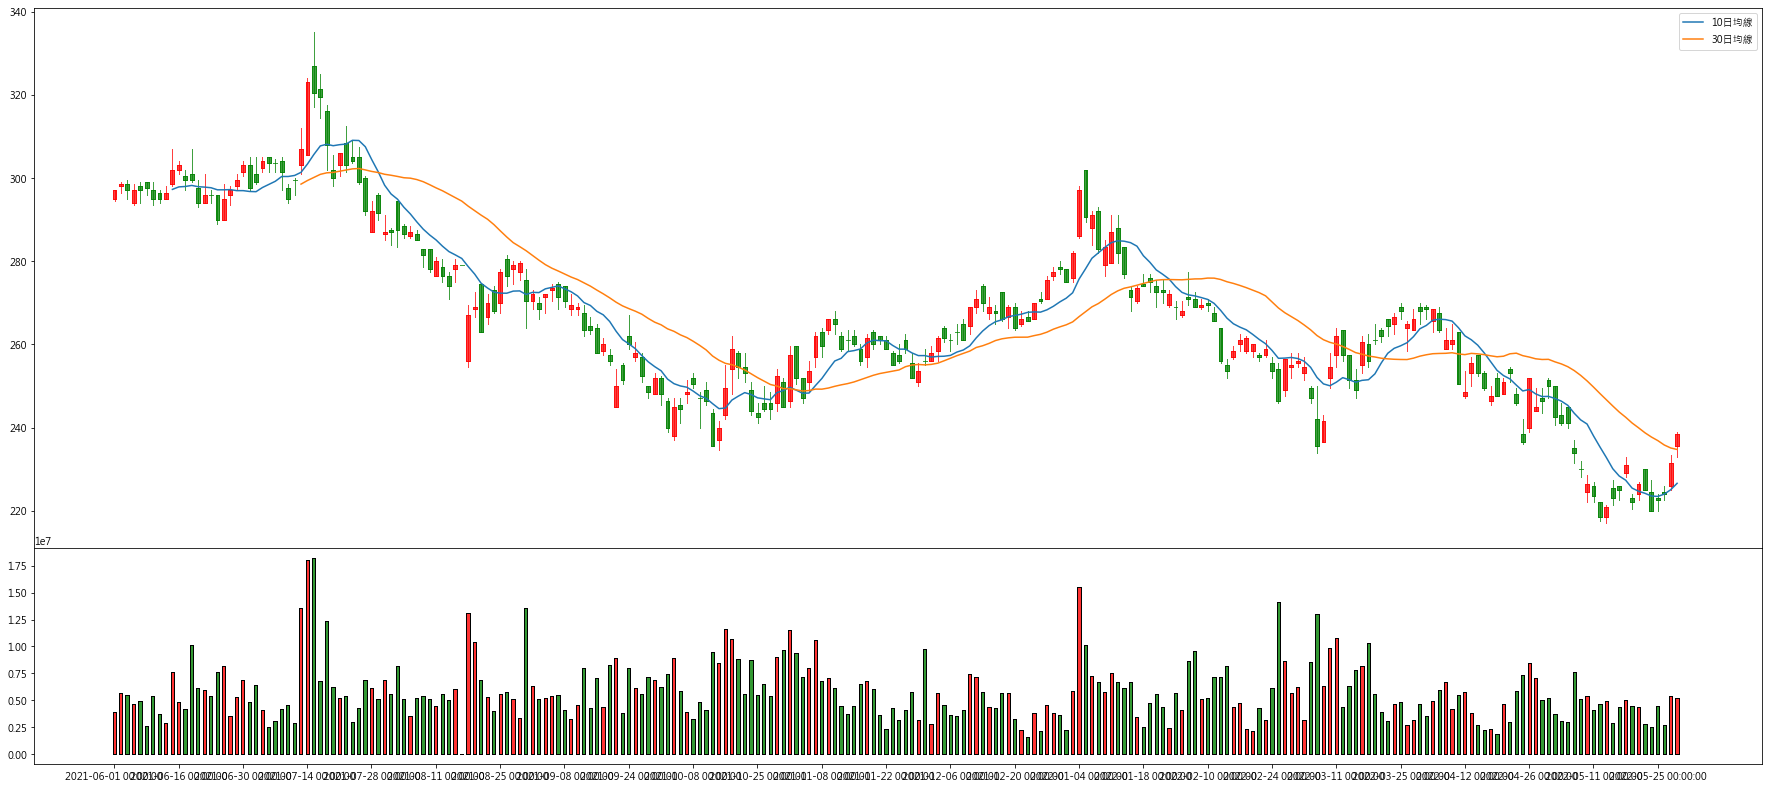

In [10]:
sma_10 = talib.SMA(np.array(df_2308['Close']), 10)
sma_30 = talib.SMA(np.array(df_2308['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2308.index), 10))
ax.set_xticklabels(df_2308.index[::10])
mpf.candlestick2_ochl(ax, df_2308['Open'], df_2308['Close'], df_2308['High'],
                      df_2308['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2308['Open'], df_2308['Close'], df_2308['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2308.index), 10))
ax2.set_xticklabels(df_2308.index[::10])

ax.legend();

---

## 2421建準

In [1]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [3]:
stock = get_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 2421)
stock

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,"2,252,959","101,812,789",43.55,46.00,43.55,45.95,+2.50,"1,669"
1,110/06/02,"1,963,434","88,510,017",45.95,45.95,44.90,45.00,-0.95,"1,369"
2,110/06/03,"683,512","30,827,446",45.35,45.40,44.55,45.00,0.00,523
3,110/06/04,"874,952","39,199,439",45.00,45.20,44.65,44.65,-0.35,661
4,110/06/07,"1,044,865","46,380,082",44.80,45.00,43.45,44.45,-0.20,813
...,...,...,...,...,...,...,...,...,...
240,111/05/25,"428,069","16,063,715",36.85,37.85,36.85,37.60,+0.60,398
241,111/05/26,"386,346","14,524,470",37.65,37.95,37.25,37.45,-0.15,358
242,111/05/27,"287,493","10,833,345",37.50,37.95,37.40,37.40,-0.05,326
243,111/05/30,"300,279","11,430,955",37.45,38.50,37.45,37.95,+0.55,304


In [ ]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

In [4]:
stock.to_csv("2421.csv")

NameError: name 'stock' is not defined

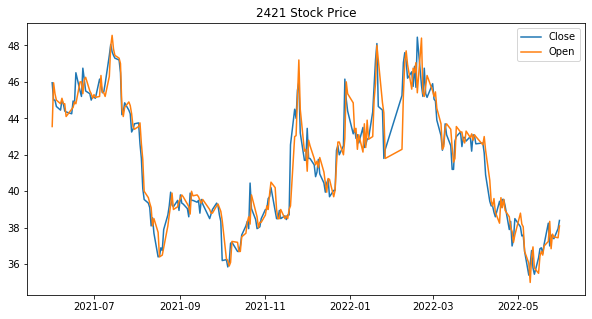

In [6]:
fig = plt.figure(figsize = (10, 5))
plt.title('2421 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [7]:
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 2421.tw
便宜價: 19.56
中間價: 26.08
太貴價: 32.6


In [8]:
import datetime as datetime

In [10]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_2421 = yf.download('2421.tw', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


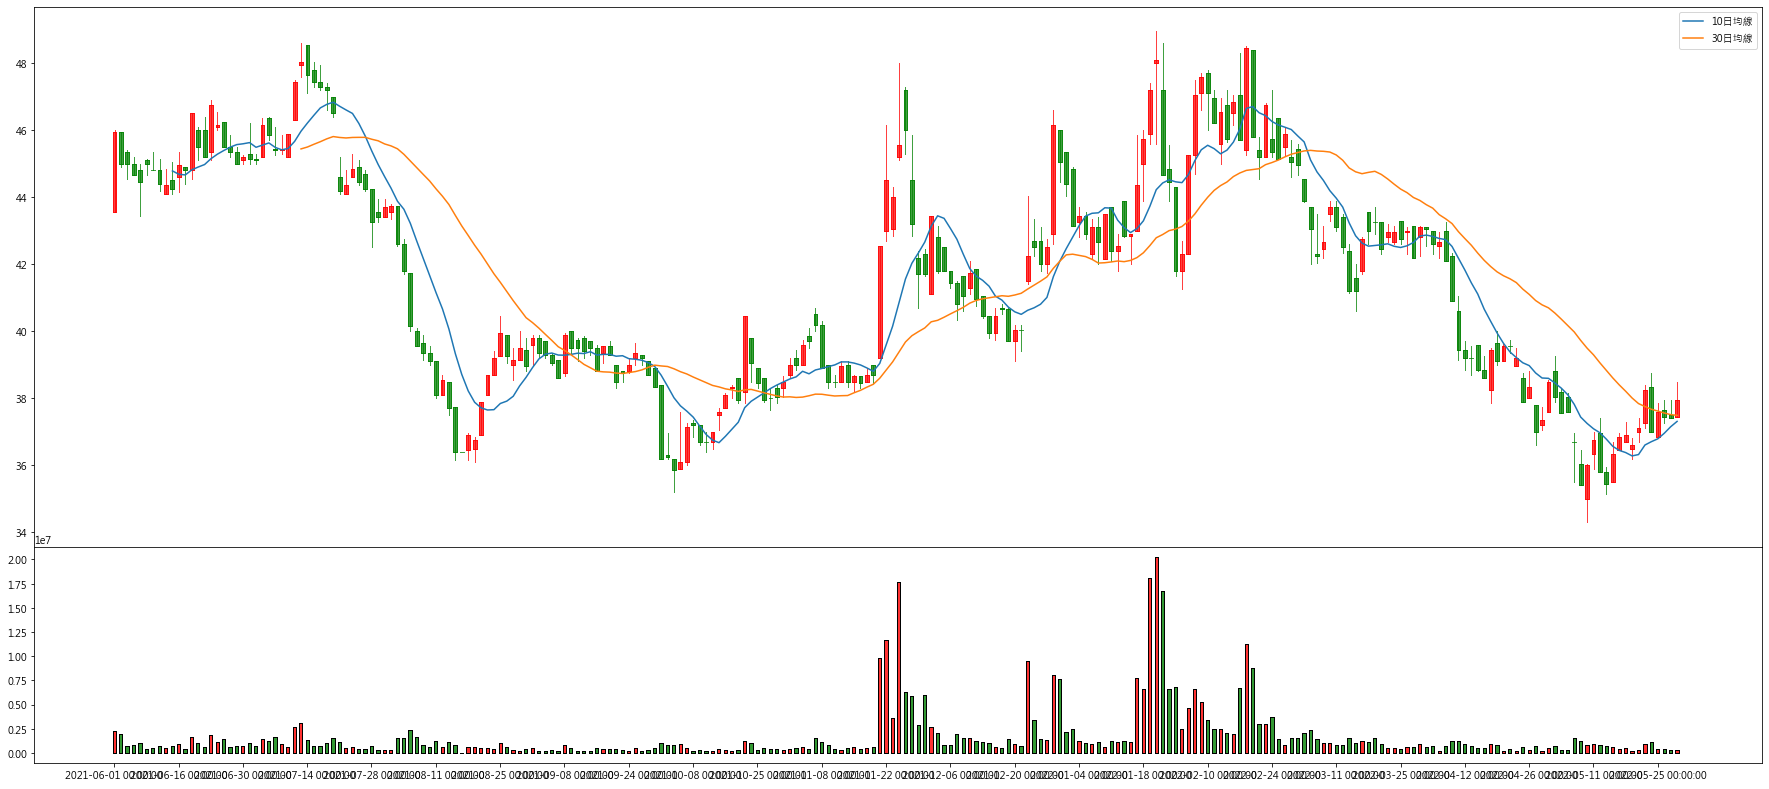

In [11]:
sma_10 = talib.SMA(np.array(df_2421['Close']), 10)
sma_30 = talib.SMA(np.array(df_2421['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2421.index), 10))
ax.set_xticklabels(df_2421.index[::10])
mpf.candlestick2_ochl(ax, df_2421['Open'], df_2421['Close'], df_2421['High'],
                      df_2421['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2421['Open'], df_2421['Close'], df_2421['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2421.index), 10))
ax2.set_xticklabels(df_2421.index[::10])

ax.legend();

---

## 6277宏正

In [12]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

In [13]:
def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [14]:
stock = get_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 6277)
stock

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,"92,889","7,785,467",83.60,84.00,83.50,83.90,+0.50,99
1,110/06/02,"89,566","7,572,000",84.00,84.80,84.00,84.60,+0.70,94
2,110/06/03,"103,305","8,777,630",85.00,85.30,84.80,85.10,+0.50,91
3,110/06/04,"75,517","6,380,541",85.00,85.00,84.00,84.60,-0.50,69
4,110/06/07,"56,923","4,801,011",84.60,84.60,84.00,84.50,-0.10,50
...,...,...,...,...,...,...,...,...,...
240,111/05/25,"35,258","2,765,197",77.60,78.80,77.60,78.80,+0.30,74
241,111/05/26,"29,463","2,318,387",78.90,78.90,78.50,78.50,-0.30,71
242,111/05/27,"27,671","2,178,629",78.70,79.20,78.50,78.70,+0.20,106
243,111/05/30,"22,108","1,744,910",78.70,79.00,78.70,79.00,+0.30,21


In [15]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-06-01 00:00:00,92889,7.78547e+06,83.6,84,83.5,83.9,+0.50,99
1,2021-06-02 00:00:00,89566,7.572e+06,84,84.8,84,84.6,+0.70,94
2,2021-06-03 00:00:00,103305,8.77763e+06,85,85.3,84.8,85.1,+0.50,91
3,2021-06-04 00:00:00,75517,6.38054e+06,85,85,84,84.6,-0.50,69
4,2021-06-07 00:00:00,56923,4.80101e+06,84.6,84.6,84,84.5,-0.10,50
5,2021-06-08 00:00:00,32000,2.6996e+06,84.5,84.5,84.3,84.3,-0.20,23
6,2021-06-09 00:00:00,45454,3.83528e+06,84.4,84.5,84.3,84.3,0.00,48
7,2021-06-10 00:00:00,65455,5.557e+06,84.1,85.2,84.1,85,+0.70,76
8,2021-06-11 00:00:00,63687,5.42241e+06,85,85.4,84.8,85.3,+0.30,57
9,2021-06-15 00:00:00,88886,7.6222e+06,85.5,86,85.5,85.8,+0.50,89


In [16]:
stock.to_csv("6277.csv")

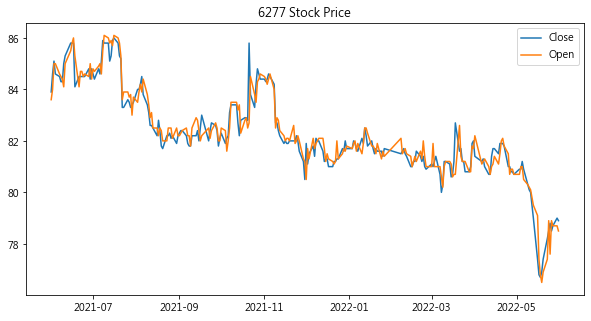

In [17]:
fig = plt.figure(figsize = (10, 5))
plt.title('6277 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [18]:
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 6277.tw
便宜價: 57.96
中間價: 77.28
太貴價: 96.6


In [19]:
import datetime as datetime

In [20]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_6277 = yf.download('6277.tw', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


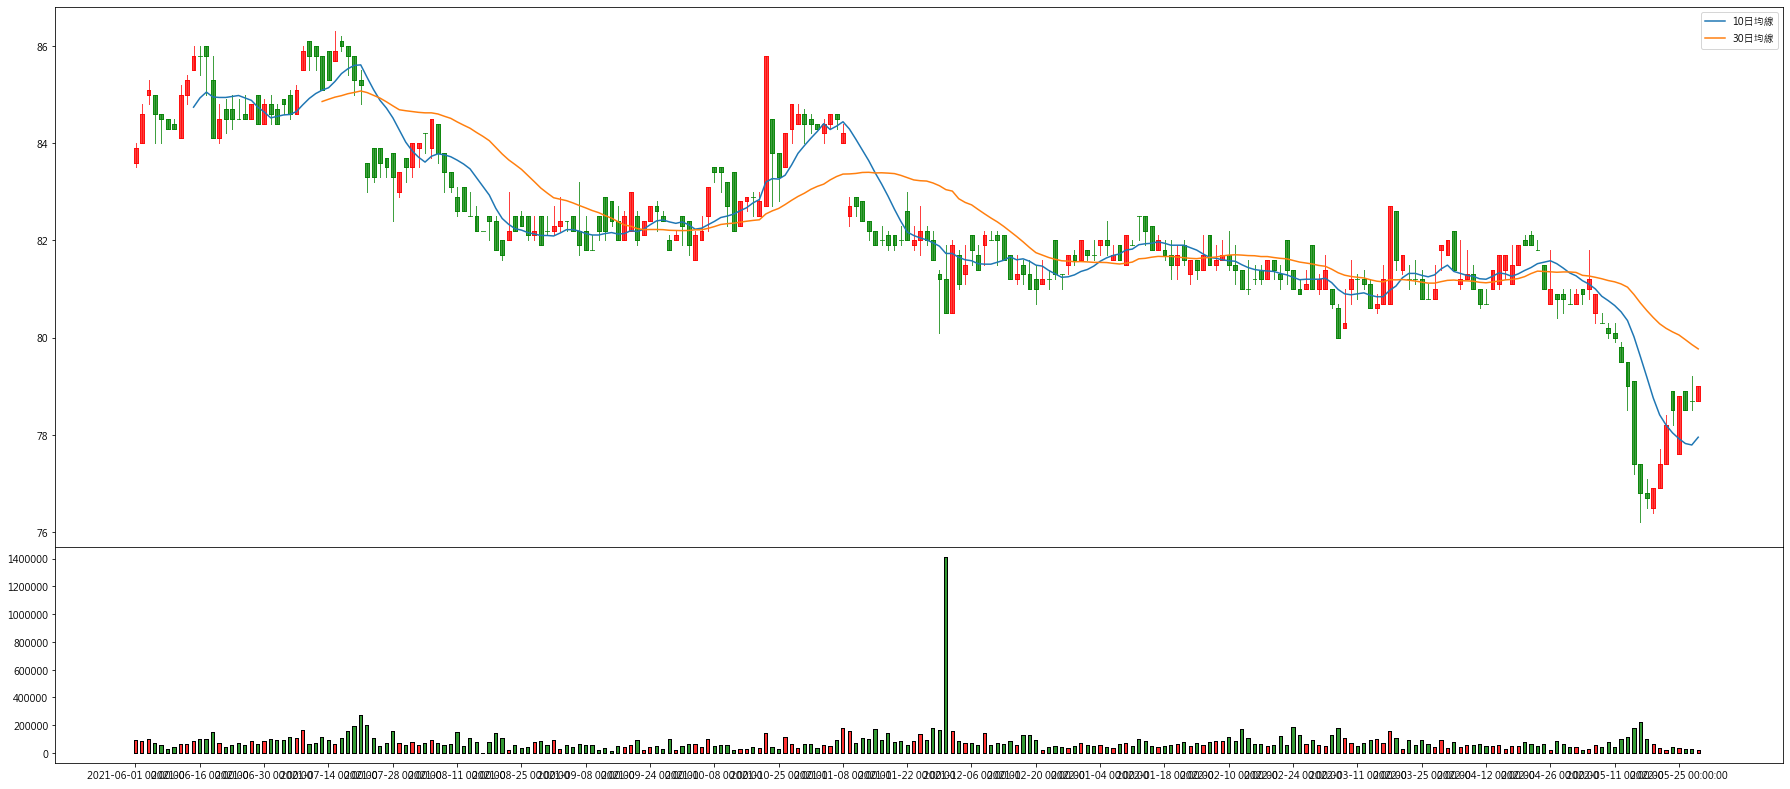

In [21]:
sma_10 = talib.SMA(np.array(df_6277['Close']), 10)
sma_30 = talib.SMA(np.array(df_6277['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_6277.index), 10))
ax.set_xticklabels(df_6277.index[::10])
mpf.candlestick2_ochl(ax, df_6277['Open'], df_6277['Close'], df_6277['High'],
                      df_6277['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_6277['Open'], df_6277['Close'], df_6277['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_6277.index), 10))
ax2.set_xticklabels(df_6277.index[::10])

ax.legend();

# 綠色凸出 大賣(大量進出 超過平常範圍內) (有可能是基金公司要調整配股權重)

---

## 2498宏達電

In [1]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [3]:
stock = get_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 2498)
stock

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,"14,489,956","546,974,118",37.50,38.80,37.00,37.25,+0.20,"6,787"
1,110/06/02,"8,953,505","329,739,009",37.25,37.50,36.35,36.40,-0.85,"4,557"
2,110/06/03,"6,118,749","226,005,234",36.60,37.40,36.40,37.25,+0.85,"3,060"
3,110/06/04,"4,146,645","152,791,674",37.10,37.25,36.65,36.65,-0.60,"2,181"
4,110/06/07,"8,652,905","308,229,174",36.30,36.45,34.70,35.85,-0.80,"4,294"
...,...,...,...,...,...,...,...,...,...
240,111/05/25,"5,631,499","258,747,259",45.90,46.25,45.65,46.00,+0.05,"3,256"
241,111/05/26,"6,312,995","292,143,443",46.50,46.85,45.70,45.90,-0.10,"3,545"
242,111/05/27,"16,031,612","761,759,606",46.70,48.80,46.55,47.05,+1.15,"9,541"
243,111/05/30,"8,209,416","394,484,820",47.75,48.40,47.60,48.15,+1.10,"5,079"


In [4]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-06-01 00:00:00,1.449e+07,5.46974e+08,37.5,38.8,37,37.25,+0.20,6787
1,2021-06-02 00:00:00,8.95350e+06,3.29739e+08,37.25,37.5,36.35,36.4,-0.85,4557
2,2021-06-03 00:00:00,6.11875e+06,2.26005e+08,36.6,37.4,36.4,37.25,+0.85,3060
3,2021-06-04 00:00:00,4.14664e+06,1.52792e+08,37.1,37.25,36.65,36.65,-0.60,2181
4,2021-06-07 00:00:00,8.65290e+06,3.08229e+08,36.3,36.45,34.7,35.85,-0.80,4294
5,2021-06-08 00:00:00,3.5078e+06,1.2667e+08,35.95,36.5,35.75,36.3,+0.45,1937
6,2021-06-09 00:00:00,1.74869e+07,6.56145e+08,36.45,38.55,36.3,37.2,+0.90,8317
7,2021-06-10 00:00:00,8.72168e+06,3.26501e+08,36.95,38.15,36.95,38.15,+0.95,4900
8,2021-06-11 00:00:00,2.34416e+07,9.18439e+08,38.8,40.2,38.25,40,+1.85,11849
9,2021-06-15 00:00:00,2.65135e+07,1.0963e+09,40.9,42.7,40.15,41.95,+1.95,13021


In [5]:
stock.to_csv("2498.csv")

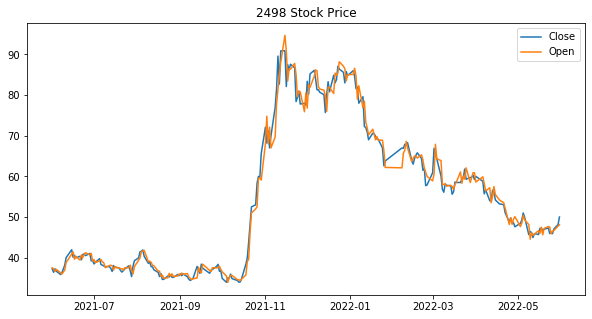

In [6]:
fig = plt.figure(figsize = (10, 5))
plt.title('2498 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [7]:
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 2498.tw
便宜價: 188.16
中間價: 250.88
太貴價: 313.6


In [8]:
import datetime as datetime

In [10]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_2498 = yf.download('2498.tw', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


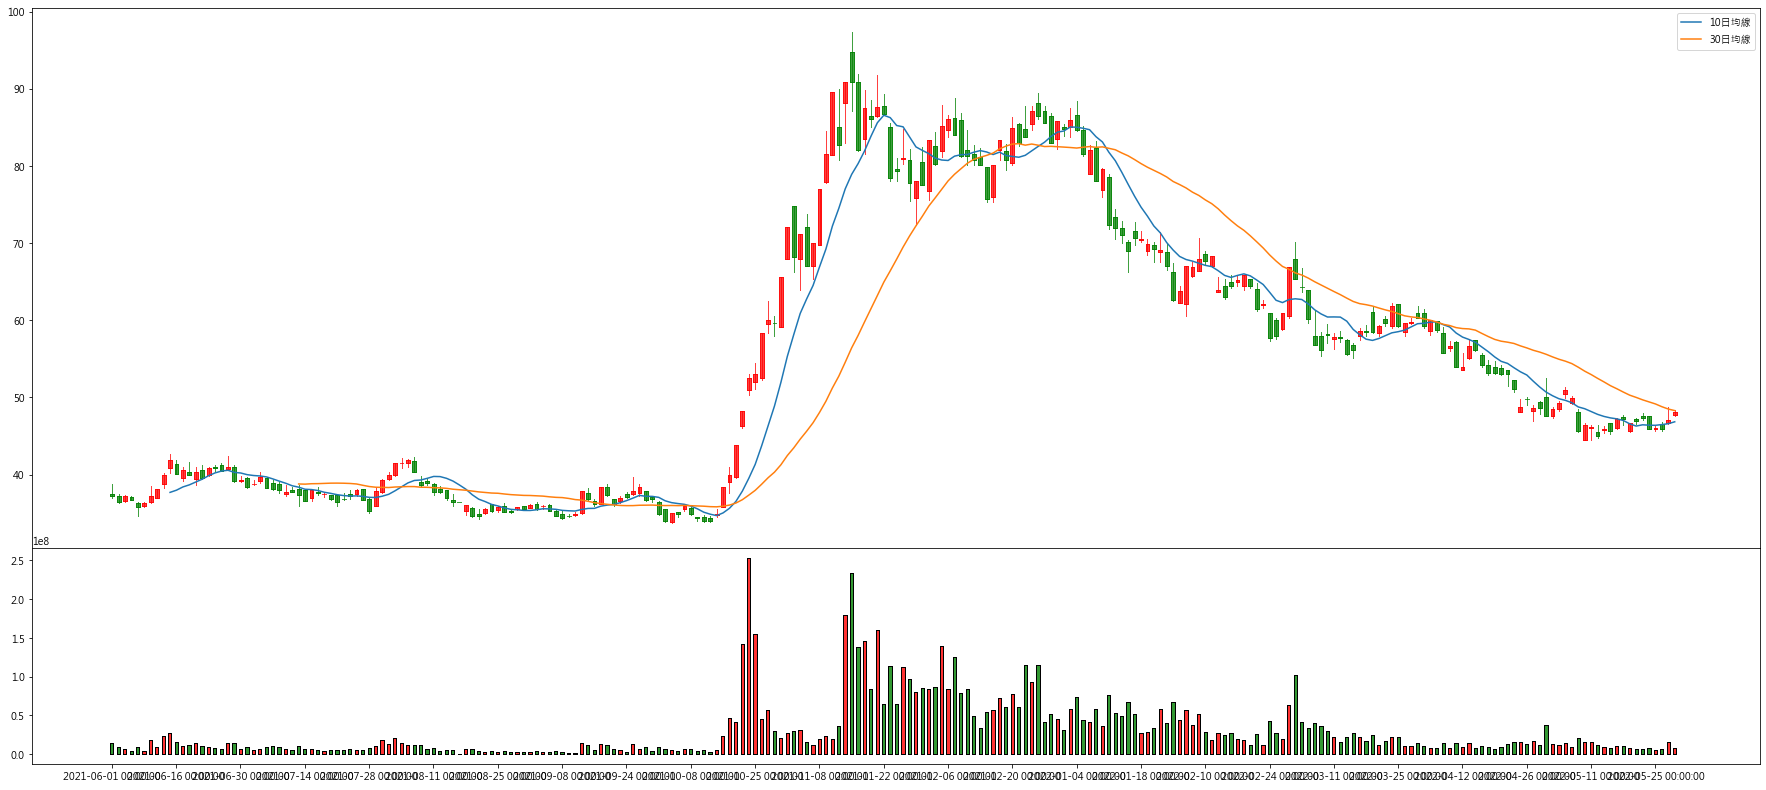

In [11]:
sma_10 = talib.SMA(np.array(df_2498['Close']), 10)
sma_30 = talib.SMA(np.array(df_2498['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2498.index), 10))
ax.set_xticklabels(df_2498.index[::10])
mpf.candlestick2_ochl(ax, df_2498['Open'], df_2498['Close'], df_2498['High'],
                      df_2498['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2498['Open'], df_2498['Close'], df_2498['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2498.index), 10))
ax2.set_xticklabels(df_2498.index[::10])

ax.legend();

---

## 6112聚碩

In [1]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [3]:
stock = get_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 6112)
stock

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,"218,235","9,190,112",42.00,43.15,41.70,42.15,+0.45,146
1,110/06/02,"143,893","6,083,063",42.35,42.45,42.10,42.15,0.00,117
2,110/06/03,"170,233","7,141,143",41.75,42.10,41.75,41.90,-0.25,145
3,110/06/04,"111,583","4,546,400",41.90,42.10,41.85,41.95,+0.05,66
4,110/06/07,"151,262","6,304,170",41.95,41.95,41.40,41.75,-0.20,119
...,...,...,...,...,...,...,...,...,...
240,111/05/25,"62,469","2,198,074",35.25,35.25,35.05,35.15,+0.15,68
241,111/05/26,"57,486","2,018,574",35.15,35.30,35.05,35.10,-0.05,57
242,111/05/27,"80,694","2,855,554",35.20,35.50,35.20,35.30,+0.20,66
243,111/05/30,"98,594","3,512,587",35.60,36.00,35.45,36.00,+0.70,98


In [4]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-06-01 00:00:00,218235,9.19011e+06,42,43.15,41.7,42.15,+0.45,146
1,2021-06-02 00:00:00,143893,6.08306e+06,42.35,42.45,42.1,42.15,0.00,117
2,2021-06-03 00:00:00,170233,7.14114e+06,41.75,42.1,41.75,41.9,-0.25,145
3,2021-06-04 00:00:00,111583,4.5464e+06,41.9,42.1,41.85,41.95,+0.05,66
4,2021-06-07 00:00:00,151262,6.30417e+06,41.95,41.95,41.4,41.75,-0.20,119
5,2021-06-08 00:00:00,52326,2.17949e+06,41.75,41.8,41.5,41.7,-0.05,63
6,2021-06-09 00:00:00,111316,4.65264e+06,41.8,42.2,41.6,41.7,0.00,80
7,2021-06-10 00:00:00,42685,1.7831e+06,41.7,41.85,41.7,41.85,+0.15,51
8,2021-06-11 00:00:00,133663,5.49618e+06,41.75,42,41.2,41.7,-0.15,110
9,2021-06-15 00:00:00,103048,4.26997e+06,41.75,41.75,41.05,41.55,-0.15,130


In [5]:
stock.to_csv("6112.csv")

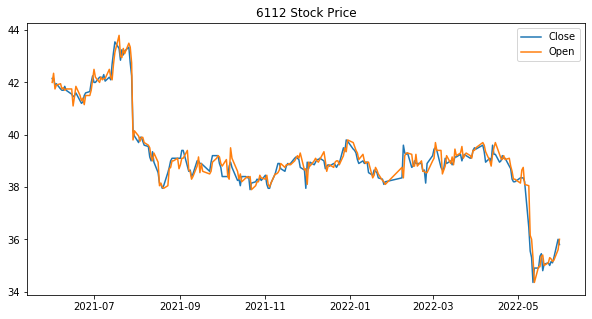

In [6]:
fig = plt.figure(figsize = (10, 5))
plt.title('6112 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [7]:
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 6112.tw
便宜價: 17.76
中間價: 23.68
太貴價: 29.6


In [8]:
import datetime as datetime

In [10]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_6112 = yf.download('6112.tw', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


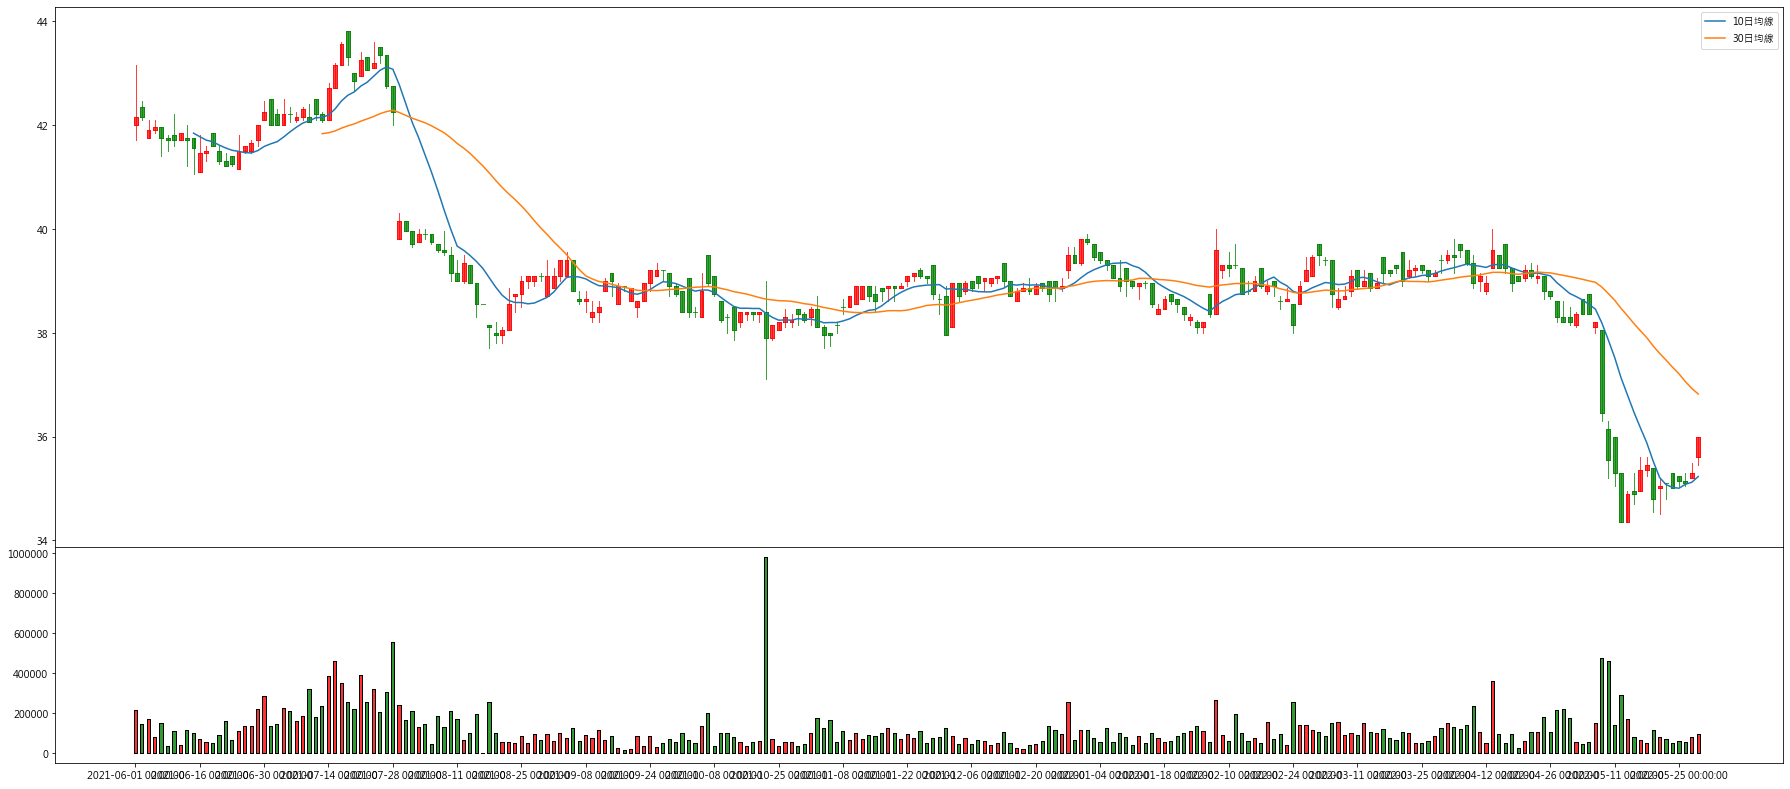

In [11]:
sma_10 = talib.SMA(np.array(df_6112['Close']), 10)
sma_30 = talib.SMA(np.array(df_6112['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_6112.index), 10))
ax.set_xticklabels(df_6112.index[::10])
mpf.candlestick2_ochl(ax, df_6112['Open'], df_6112['Close'], df_6112['High'],
                      df_6112['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_6112['Open'], df_6112['Close'], df_6112['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_6112.index), 10))
ax2.set_xticklabels(df_6112.index[::10])

ax.legend();

---

## 6163華電網

In [1]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [3]:
def get_otc_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y_%m").tolist()

    df = pd.DataFrame()
#     pd.set_option('display.max_rows', None)
    for day in month_list:
        year, month = day.split('_')
        day = str(int(year) - 1911) + '/' + month
        url = "https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43_result.php?l=zh-tw&d=" + day + "&stkno=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['aaData'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [4]:
stock  = get_otc_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 6163)
stock 

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,711,"13,321",18.50,18.90,18.50,18.90,0.35,270
1,110/06/02,535,"10,002",19.00,19.05,18.45,18.55,-0.35,266
2,110/06/03,636,"11,785",18.55,18.80,18.20,18.70,0.15,318
3,110/06/04,463,"8,494",18.40,18.50,18.15,18.20,-0.50,224
4,110/06/07,404,"7,320",18.15,18.40,17.70,18.30,0.10,209
...,...,...,...,...,...,...,...,...,...
240,111/05/25,175,"2,617",14.85,15.05,14.80,15.00,0.05,143
241,111/05/26,235,"3,508",15.00,15.10,14.80,14.95,-0.05,116
242,111/05/27,140,"2,096",15.00,15.05,14.90,14.95,0.00,112
243,111/05/30,196,"2,929",15.00,15.00,14.90,14.95,0.00,114


In [6]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-06-01 00:00:00,711,13321,18.5,18.9,18.5,18.9,0.35,270
1,2021-06-02 00:00:00,535,10002,19,19.05,18.45,18.55,-0.35,266
2,2021-06-03 00:00:00,636,11785,18.55,18.8,18.2,18.7,0.15,318
3,2021-06-04 00:00:00,463,8494,18.4,18.5,18.15,18.2,-0.50,224
4,2021-06-07 00:00:00,404,7320,18.15,18.4,17.7,18.3,0.10,209
5,2021-06-08 00:00:00,1889,34913,18.4,18.9,18.05,18.2,-0.10,397
6,2021-06-09 00:00:00,336,6051,18.1,18.25,17.9,17.9,-0.30,167
7,2021-06-10 00:00:00,529,9467,18.05,18.1,17.7,17.85,-0.05,242
8,2021-06-11 00:00:00,1886,32395,17.6,17.75,16.95,16.95,-0.90,731
9,2021-06-15 00:00:00,392,6769,16.95,17.6,16.95,17.2,0.25,215


In [7]:
stock.to_csv("6163.csv")

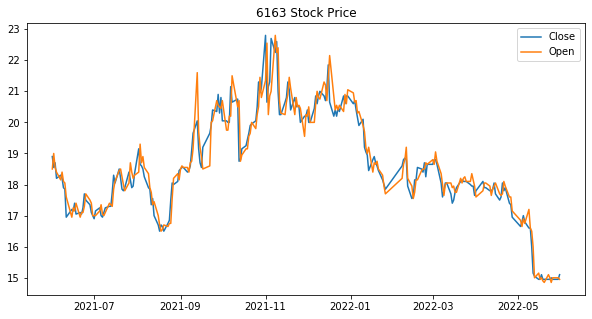

In [8]:
fig = plt.figure(figsize = (10, 5))
plt.title('6163 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [9]:
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 6163.two
便宜價: 9.15
中間價: 12.2
太貴價: 15.25


In [10]:
import datetime as datetime

In [11]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_6163 = yf.download('6163.two', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


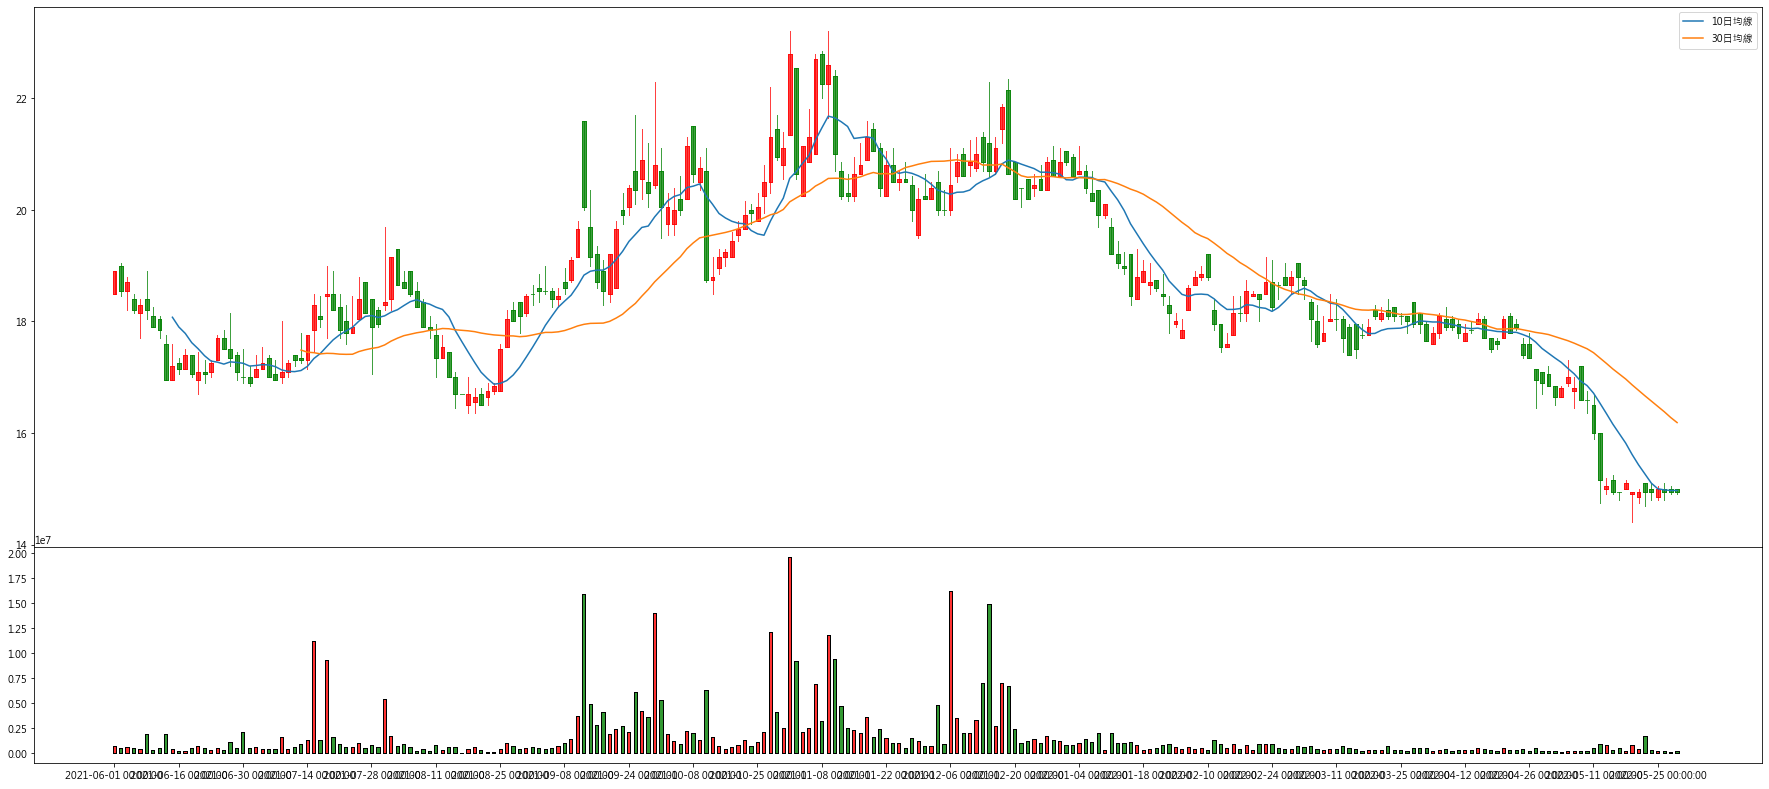

In [12]:
sma_10 = talib.SMA(np.array(df_6163['Close']), 10)
sma_30 = talib.SMA(np.array(df_6163['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_6163.index), 10))
ax.set_xticklabels(df_6163.index[::10])
mpf.candlestick2_ochl(ax, df_6163['Open'], df_6163['Close'], df_6163['High'],
                      df_6163['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_6163['Open'], df_6163['Close'], df_6163['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_6163.index), 10))
ax2.set_xticklabels(df_6163.index[::10])

ax.legend();

---

## 2317鴻海

In [1]:
import requests as r
import json
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import mpl_finance as mpf
import yfinance as yf
import seaborn as sns
import talib
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [3]:
stock = get_stock_data(start_year = 2021, start_month = 6, end_year = 2022, end_month = 5, stock_code = 2317)
stock

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/06/01,"22,421,329","2,559,926,686",114.50,115.00,113.50,114.50,+1.00,"14,042"
1,110/06/02,"33,224,565","3,741,059,700",115.00,115.50,111.00,112.00,-2.50,"21,467"
2,110/06/03,"24,092,372","2,687,851,339",113.00,113.00,110.50,111.00,-1.00,"12,120"
3,110/06/04,"30,062,210","3,321,498,146",110.00,112.50,109.00,112.00,+1.00,"16,040"
4,110/06/07,"20,456,903","2,266,693,907",112.50,112.50,109.00,110.50,-1.50,"12,472"
...,...,...,...,...,...,...,...,...,...
240,111/05/25,"77,602,667","8,479,699,424",108.50,110.00,108.00,109.50,+1.50,"33,228"
241,111/05/26,"40,239,038","4,404,353,832",110.00,110.50,108.50,109.00,-0.50,"21,229"
242,111/05/27,"52,655,635","5,809,140,386",110.00,111.00,109.50,110.00,+1.00,"21,201"
243,111/05/30,"44,021,707","4,841,079,725",110.50,111.00,109.00,110.50,+0.50,"18,566"


In [4]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-06-01 00:00:00,2.24213e+07,2.55993e+09,114.5,115,113.5,114.5,+1.00,14042
1,2021-06-02 00:00:00,3.32246e+07,3.74106e+09,115,115.5,111,112,-2.50,21467
2,2021-06-03 00:00:00,2.40924e+07,2.68785e+09,113,113,110.5,111,-1.00,12120
3,2021-06-04 00:00:00,3.00622e+07,3.3215e+09,110,112.5,109,112,+1.00,16040
4,2021-06-07 00:00:00,2.04569e+07,2.26669e+09,112.5,112.5,109,110.5,-1.50,12472
5,2021-06-08 00:00:00,1.85933e+07,2.05706e+09,111,111.5,110,110.5,0.00,9979
6,2021-06-09 00:00:00,2.39003e+07,2.62939e+09,110,111,109.5,109.5,-1.00,12614
7,2021-06-10 00:00:00,1.93856e+07,2.14714e+09,110,111.5,109.5,110.5,+1.00,8737
8,2021-06-11 00:00:00,3.87502e+07,4.37954e+09,111.5,114.5,111.5,113.5,+3.00,19549
9,2021-06-15 00:00:00,2.36695e+07,2.66952e+09,113.5,114.5,112,113,-0.50,12539


In [5]:
stock.to_csv("2317.csv")

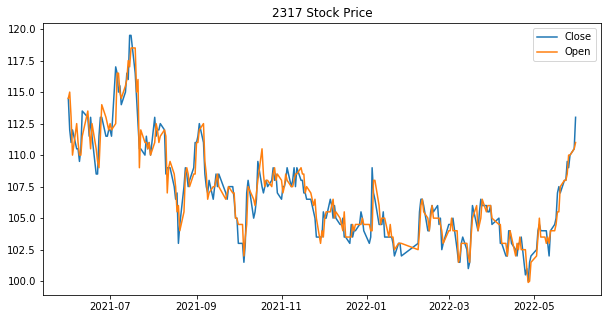

In [6]:
fig = plt.figure(figsize = (10, 5))
plt.title('2317 Stock Price')
plt.plot(stock['日期'], stock['收盤價'])
plt.plot(stock['日期'], stock['開盤價'])
plt.legend(['Close', 'Open'])

In [7]:
import yfinance as y 
import pandas as p 

stockid = input('股票代碼: ')
stock = y.Ticker(stockid)

dividend = round(stock.dividends, 1)
data = p.DataFrame(dividend)
data = data.reset_index()
data.columns = ['日期', '股利']
average = data['股利'].tail(10).mean()
safe = 0.8 
cheap = round(average * 15 * safe, 2)
middle = round(average * 20 * safe, 2)
expensive = round(average * 25 * safe, 2)

print(f"便宜價: {cheap}")
print(f"中間價: {middle}")
print(f"太貴價: {expensive}")

股票代碼: 2317.tw
便宜價: 38.76
中間價: 51.68
太貴價: 64.6


In [8]:
import datetime as datetime

In [9]:
start = datetime.datetime(2021,6,1)
end = datetime.datetime(2022,5,31)
df_2317 = yf.download('2317.tw', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


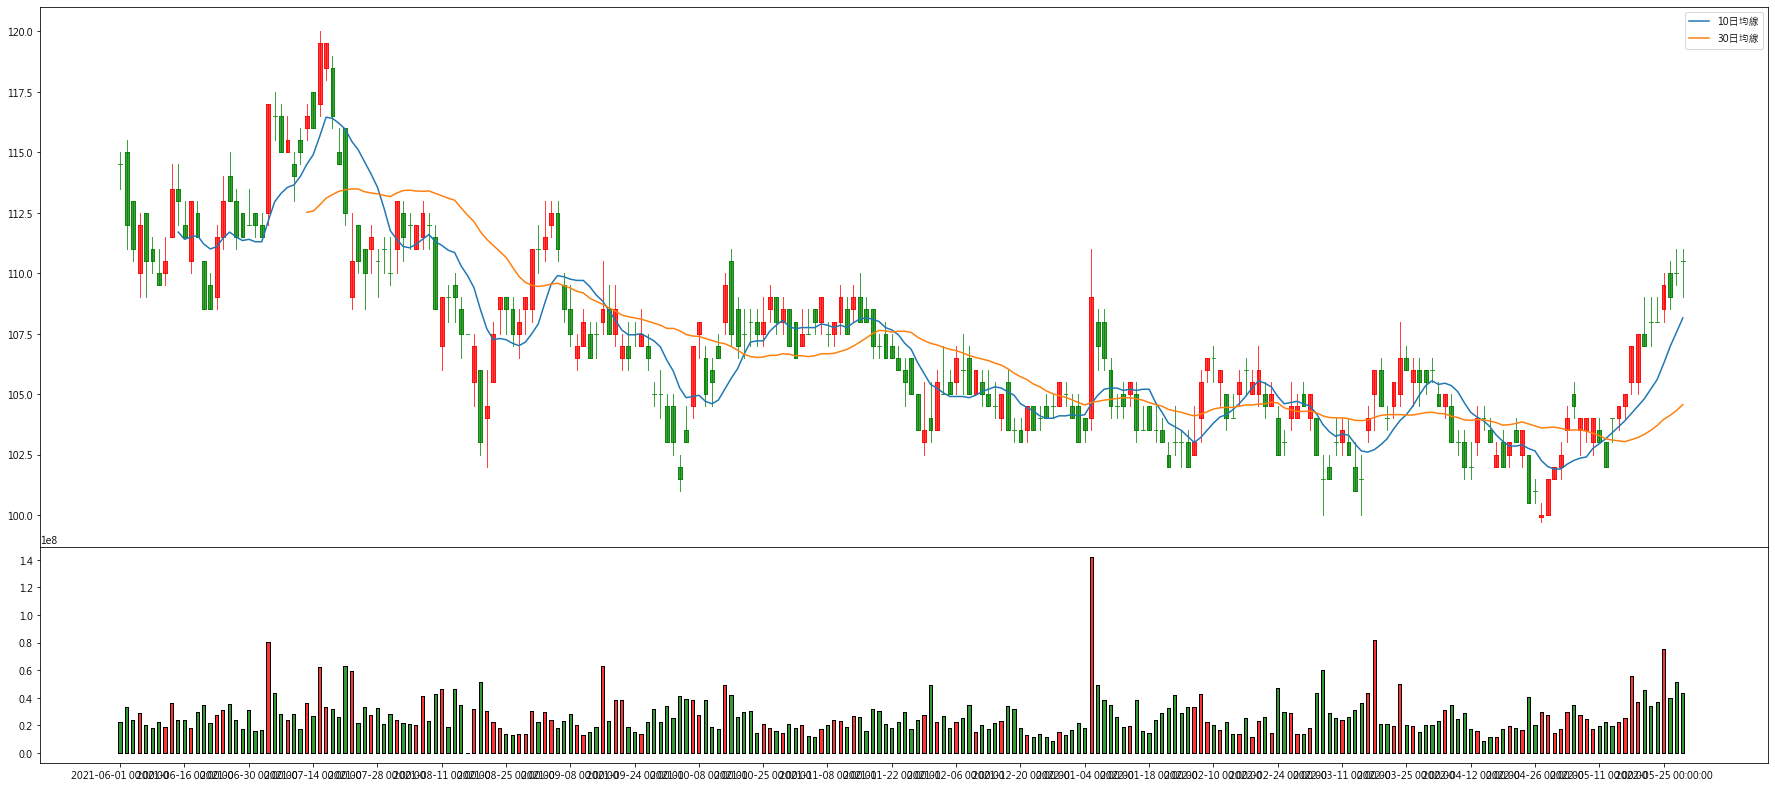

In [10]:
sma_10 = talib.SMA(np.array(df_2317['Close']), 10)
sma_30 = talib.SMA(np.array(df_2317['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2317.index), 10))
ax.set_xticklabels(df_2317.index[::10])
mpf.candlestick2_ochl(ax, df_2317['Open'], df_2317['Close'], df_2317['High'],
                      df_2317['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2317['Open'], df_2317['Close'], df_2317['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2317.index), 10))
ax2.set_xticklabels(df_2317.index[::10])

ax.legend();

---

## 回測

In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
#%matplotlib inline

tickers=['4721.TWO','2377.TW','2308.TW','2421.TW','6277.TW','2498.TW','6112.TW','6163.TWO','2317.TW']
# tickers=['^TWII']
pf_data=pd.DataFrame()
for t in tickers:
    pf_data[t]=yf.download(t,data_source='yahoo', start='2021-6-1', end='2022-5-31')['Close']
assets=['4721.TWO','2377.TW','2308.TW','2421.TW','6277.TW','2498.TW','6112.TW','6163.TWO','2317.TW']
# assets = ['^TWII']
print(pf_data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
              4721.TWO  2377.TW  2308.TW    2421.TW    6277.TW    2498.TW  \
Date                                                                        
2021-06-01   61.900002    171.5    297.0  45.950001  83.900002  37.250000   
2021-06-02   62.900002    170.0    298.5  45.000000  84.599998  36.400002   
2021-06-03   62.000000    175.0    297.0  45.000000  85.099998  37.2500

array([0.45508904, 0.32360293, 0.6047347 , 0.27489994, 0.36134541,
       0.32493458, 0.14036346, 0.99908389, 0.46525657])

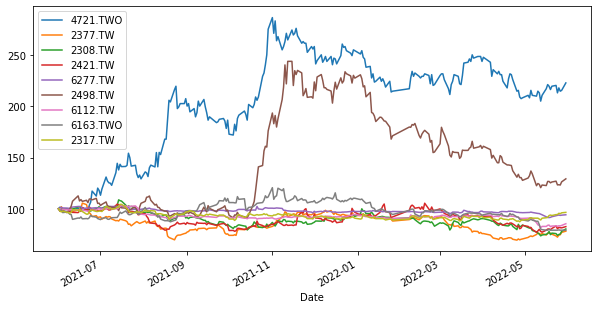

In [33]:
(pf_data / pf_data.iloc[0]*100).plot(figsize=(10,5))
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean() * 250
log_returns.cov() * 250
log_returns.corr()
num_assets = len(assets)
num_assets
arr = np.random.random(num_assets)
arr

In [34]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.09954733, 0.13013929, 0.04664873, 0.09014953, 0.07920861,
       0.10574467, 0.18734741, 0.11268197, 0.14853247])

In [35]:
pf_returns_arr=np.zeros(1000)
pf_volatilites_arr=np.zeros(1000)
all_weights=np.zeros((1000,len(tickers)))
SR_arr=np.zeros(1000)

In [36]:
for x in range(1000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    all_weights[x,:]=weights
    pf_returns_arr[x]=np.sum(weights*log_returns.mean())*250
    pf_volatilites_arr[x]=np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))
    SR_arr[x]=pf_returns_arr[x]/pf_volatilites_arr[x]

In [37]:
pf_returns=np.array(pf_returns_arr)
pf_volatilites=np.array(pf_volatilites_arr)
SR_ratio=np.array(SR_arr)
pf_returns,pf_volatilites,SR_ratio

(array([-2.42646291e-02,  3.56068831e-02,  5.99586431e-03, -3.90637188e-02,
         1.23904699e-02,  9.17711890e-03, -5.65825448e-03, -7.90788209e-03,
         1.56311715e-03, -1.08599222e-01,  4.80863205e-02, -3.67440315e-02,
        -3.76935193e-04,  2.50742456e-02, -1.01497835e-01,  1.07502449e-01,
         8.48964056e-02,  1.34314213e-01, -1.39533032e-03, -8.17911046e-03,
        -3.17654598e-02, -3.49849308e-02,  5.72801959e-02, -7.49154862e-03,
         5.54811047e-02,  2.75634196e-03,  3.94486442e-02,  5.39287809e-02,
        -3.66351097e-02, -4.64216438e-02, -5.07902387e-02,  3.23280481e-02,
        -1.70658723e-02, -8.62261683e-02, -8.23225296e-02,  1.97599205e-02,
        -9.22647338e-02, -2.06103358e-02, -3.19090078e-02,  4.60868176e-02,
         2.59198599e-02,  2.13882514e-02,  6.16339318e-02,  1.94263888e-02,
         9.62001354e-02,  4.56101565e-02, -9.84451951e-02, -5.67187239e-02,
        -2.74247306e-02,  9.25929278e-02,  7.31142804e-02, -1.47108003e-01,
         6.0

In [38]:
SR_ratio.max()
SR_ratio.argmax()
SR_ratio[SR_ratio.argmax()]
all_weights[SR_ratio.argmax()]
max_SR_return=pf_returns_arr[SR_ratio.argmax()]
max_SR_volatilities=pf_volatilites_arr[SR_ratio.argmax()]

In [39]:
max_SR_return=pf_returns_arr[SR_ratio.argmax()]
max_SR_return

0.23004010936748315

In [40]:
max_SR_volatilities=pf_volatilites_arr[SR_ratio.argmax()]
max_SR_volatilities

0.29112932754782433

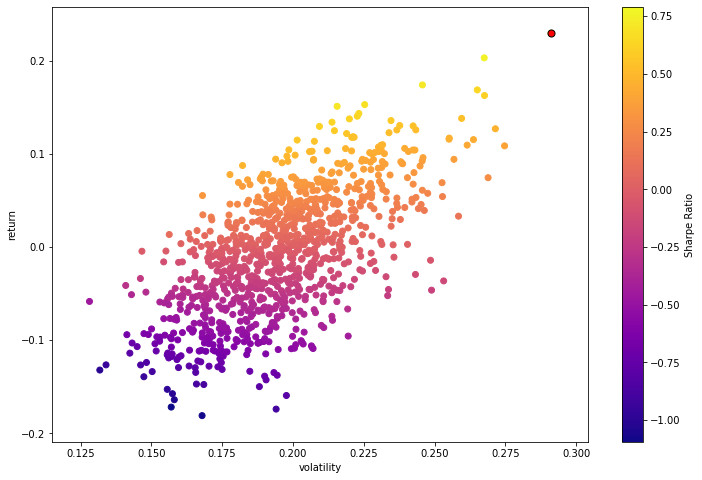

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(pf_volatilites_arr,pf_returns_arr,c=SR_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('return')
plt.scatter(max_SR_volatilities,max_SR_return,c='red',s=50,edgecolors='black')

In [42]:
#Expected Portfolio Return
np.sum(weights * log_returns.mean()) * 250
#Expected Portfolio Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))
#Expected Portfolio Volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.1878451034602165

In [43]:
pfolio_returns = []
pfolio_volatilities = []
maxreturn = 0
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    if pfolio_returns[x]>maxreturn:
        maxreturn = pfolio_returns[x]
        maxweight = weights
        maxvolatilities = pfolio_volatilities[x]
print('maxreturn = ',maxreturn)
print('weights when max = ',maxweight)
print('volatilities when max',maxvolatilities)

maxreturn =  0.21412366037199826
weights when max =  [0.26623034 0.03367851 0.11185968 0.07840818 0.15141182 0.2696591
 0.0330939  0.05216151 0.00349697]
volatilities when max 0.2855413512830506


In [44]:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns, pfolio_volatilities

(array([ 4.19228234e-03, -1.33773723e-02,  5.90922909e-02,  7.61260259e-02,
        -5.66193057e-02, -3.55275091e-02, -1.45085932e-01,  8.44576672e-03,
        -5.29114251e-02,  1.89191248e-01,  1.51186046e-02, -2.10972980e-02,
         2.16126228e-02, -1.37928314e-01, -5.18773846e-02,  4.07270636e-02,
         2.95316551e-02, -9.00442211e-02,  1.67305188e-01,  9.18718743e-03,
         4.07296819e-02, -1.09408371e-01,  3.39083037e-02,  5.22820010e-02,
        -1.04922330e-02,  7.71056142e-05, -4.83460411e-02,  8.45704148e-02,
         2.98838386e-02,  5.04083145e-02,  7.98085340e-02,  3.56870157e-02,
         4.06967006e-03,  1.12149389e-02,  1.46346758e-02,  5.01943244e-02,
         1.63436711e-01, -8.99099020e-02, -6.01055799e-02, -4.42507402e-02,
        -1.89500932e-02,  5.13501072e-02, -5.43988228e-02, -3.57245718e-02,
        -9.99411475e-02,  2.40294744e-02, -4.64108423e-02, -1.20976813e-02,
        -8.69352765e-02, -6.48540039e-02, -2.45219541e-03,  5.47000352e-02,
         6.8

Text(0, 0.5, 'Expected Return')

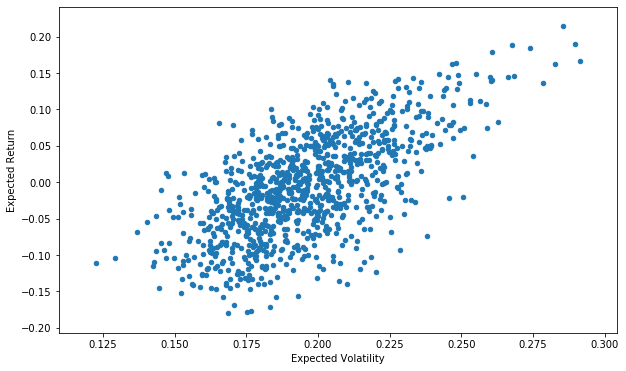

In [45]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')